In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys
import importlib
import glob
from scipy.signal import find_peaks


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import bode_tools
import DREAM_colors as dc
import math_functions as mf
import BodeClass_PSI as bc
import ExperimentClass as ec

importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc)
importlib.reload(ec)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

In [11]:
list_path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/00_experiments_lists/"
file_name = "20241203_chlamy_bode_list"
exp_list = pd.read_csv(list_path + file_name + ".csv", sep=";", decimal=",")
exp_list

,Name,F_max,F_max_source,A_voltage,Amp,Strain,Amp_Ek,Offset_Ek,Cond,Time_start,Date,Replicate,Cell_count_mL
0,20240723_bode_stt71A6_control_1,0.99,activation,5.00,10.0,stt7,NaN,NaN,control,15.5,23/07/2024,1,NaN
1,20240723_bode_stt71A6_qE_act_1,0.86,activation,7.75,15.5,stt7,NaN,NaN,qE_act,19.0,23/07/2024,1,NaN
2,20240724_bode_stt71A6_control_2,0.83,activation,5.00,10.0,stt7,NaN,NaN,control,16.0,24/07/2024,2,NaN
3,20240724_bode_stt71A6_qE_act_2,0.70,activation,9.00,18.0,stt7,NaN,NaN,qE_act,19.0,24/07/2024,2,NaN
4,20240725_bode_stt71A6_control_3,1.32,activation,5.00,10.0,stt7,NaN,NaN,control,15.0,25/07/2024,3,NaN
5,20240725_bode_stt71A6_qE_act_3,1.20,activation,7.00,14.0,stt7,NaN,NaN,qE_act,18.0,25/07/2024,3,NaN
6,20241203_bode_stt71A6_Ek,1.36,bode,23.70,11.2,stt7,0.25,1.0,control,12.0,03/12/2024,1,803000.0
7,20241203_bode_stt71A6_2Ek,NaN,NaN,46.00,11.2,stt7,0.25,2.0,control,15.5,03/12/2024,1,803000.0
8,20241204_bode_stt71A6_Ek,NaN,NaN,23.70,11.2,stt7,0.25,1.0,control,11.0,04/12/2024,2,594000.0
9,20241204_bode_stt71A6_2Ek,NaN,NaN,46.00,11.2,stt7,0.25,2.0,control,15.5,04/12/2024,2,594000.0


In [12]:
t_Fmax = [0.1, 0.12]
for name in exp_list["Name"]:
    exp = ec.Experiment(name, "PSI", DataType = ".csv", sep=';')
    try:
        index = exp.records.index("AL0_before")
        x = exp.clean_times[index]
        y = exp.clean_data[index]
        F_max = np.mean(y[np.where(x>= t_Fmax[0] + 30)[0][0] :np.where(x>= t_Fmax[1] + 30)[0][0]])
        exp_list.loc[exp_list["Name"] == name, "F_max"] = F_max
        exp_list.loc[exp_list["Name"] == name, "F_max_source"] = "bode"
        
    except:
        exp_list.loc[exp_list["Name"] == name, "F_max_source"] = "activation"
        
# exp_list.to_csv(list_path + "00_bode_phaeo_list.csv", sep=";", decimal=",", index=False)

exp_list

,Name,F_max,F_max_source,A_voltage,Amp,Strain,Amp_Ek,Offset_Ek,Cond,Time_start,Date,Replicate,Cell_count_mL
0,20240723_bode_stt71A6_control_1,0.990000,activation,5.00,10.0,stt7,NaN,NaN,control,15.5,23/07/2024,1,NaN
1,20240723_bode_stt71A6_qE_act_1,0.860000,activation,7.75,15.5,stt7,NaN,NaN,qE_act,19.0,23/07/2024,1,NaN
2,20240724_bode_stt71A6_control_2,0.830000,activation,5.00,10.0,stt7,NaN,NaN,control,16.0,24/07/2024,2,NaN
3,20240724_bode_stt71A6_qE_act_2,0.700000,activation,9.00,18.0,stt7,NaN,NaN,qE_act,19.0,24/07/2024,2,NaN
4,20240725_bode_stt71A6_control_3,1.320000,activation,5.00,10.0,stt7,NaN,NaN,control,15.0,25/07/2024,3,NaN
5,20240725_bode_stt71A6_qE_act_3,1.200000,activation,7.00,14.0,stt7,NaN,NaN,qE_act,18.0,25/07/2024,3,NaN
6,20241203_bode_stt71A6_Ek,1.355988,bode,23.70,11.2,stt7,0.25,1.0,control,12.0,03/12/2024,1,803000.0
7,20241203_bode_stt71A6_2Ek,1.305100,bode,46.00,11.2,stt7,0.25,2.0,control,15.5,03/12/2024,1,803000.0
8,20241204_bode_stt71A6_Ek,1.512121,bode,23.70,11.2,stt7,0.25,1.0,control,11.0,04/12/2024,2,594000.0
9,20241204_bode_stt71A6_2Ek,1.459170,bode,46.00,11.2,stt7,0.25,2.0,control,15.5,04/12/2024,2,594000.0


In [13]:
exp_list.to_csv(list_path + file_name + "_Fm_ok.csv", sep=";", decimal=",", index=False)

Text(0, 0.5, 'Fluo (a.u.)')

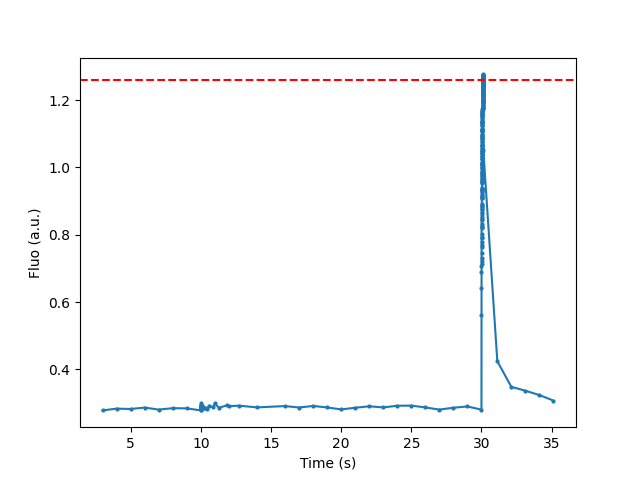

In [14]:
fig, ax = plt.subplots()
index = exp.records.index("AL0_before")
x = exp.clean_times[index]
y = exp.clean_data[index]
ax.plot(x, y, '-o', markersize=2)
t_Fmax = [0.1, 0.12]
F_max = np.mean(y[np.where(x>= t_Fmax[0] + 30)[0][0] :np.where(x>= t_Fmax[1] + 30)[0][0]])
ax.axhline(F_max, color='r', linestyle='--')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Fluo (a.u.)")